# Exercise TH.1

**Exercise TH.1** *(Rejection Sampling inside Geometric Shapes)*

In Training Sheet **TG**, we used the uniform distribution $U(0,1)$ and several transformations to generate uniform distributions for lines, rectangles, circles and triangles. This week, we will use rejection sampling to generate uniform samples inside geometric shapes, and measure the efficiency of our procedures.

In each rejection sampling experiment, we will generate $N$ candidate values, and test if they meet the rejection condition.
If they do, we consider them part of the rejection set $R$, otherwise they are part of the acceptance set $A$.  We call

$$ c = \frac{\vert A\vert}{\vert A \vert + \vert R \vert} = \frac{\vert A\vert}{N} $$

the *acceptance ratio* of the experiment. For a given rejection sampling algorithm, we call the limit of $c$ as $N \to \infty$ the *expected acceptance ratio*.

In [1]:
# Some boilerplate code you can use to plot your rejection sample results
import matplotlib.pyplot as plt
from numpy.random import random as uniform

import numpy as np
import math
from math import cos,sin, pi, sqrt
from numpy import arccos, arcsin

def draw_axis(xs, ys):
    xmin, xmax, ymin, ymax = min(xs), max(xs), min(ys), max(ys)
    plt.plot([xmin,xmax,],[0,0], color="red")
    plt.plot([0,0],[ymin,ymax], color="red")

def render_rs_2d(accept, reject, axes=False):
    axs = [x for (x,_) in accept]
    ays = [y for (_,y) in accept]
    rxs = [x for (x,_) in reject]
    rys = [y for (_,y) in reject]
    plt.gca().set_aspect('equal')
    #
    # If you have trouble distinguishing the colors of the samples, you can change the colors here
    #
    # Accepts
    plt.scatter(axs, ays, linewidth=0.5, s=2, color=None)
    # Rejects
    plt.scatter(rxs, rys, linewidth=0.5, s=.5, color=None)
    if axes: draw_axis(axs+rxs, ays+rys)
    plt.show()

**TG.1 Example 1** *(Checkerboard)*

In this sample, we generate uniformly random points in $[0,1]^2$. We accept a sample if it lays in the square $[0, 0,5]^2$ or $[0.5, 1]^2$, otherwise we reject it.

**Accepted points** are shown blue, **rejected points** are shown in faint orange.
Since the total area we sample from is 1 and the two accepting regions have a combined area of $0.5$, it is equally likely for a point to be accepted or not.
Hence, we get an expected acceptance ratio of 50%.
The actually measured acceptance ratio is printed underneath the plot.

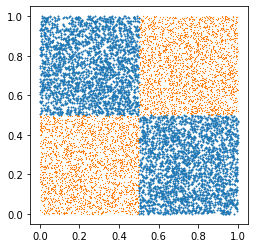

Acceptance Ratio: 0.508800


In [2]:
N = 10_000
accept = []
reject = []

for _ in range(N):
    x, y = uniform(), uniform()
    # != is XOR
    if (x >= .5) != (y >= .5):
        # accept point, add to accept list
        accept.append((x,y))
    else:
        # reject point, add to reject list
        reject.append((x,y))

render_rs_2d(accept, reject)

# Measured AR
acceptance = len(accept) / N
print(f"Acceptance Ratio: {acceptance:.6f}")

**TG.2 Task (a)** *(Circle Transform)*

Last week we have discovered an elegant way of uniformly sampling points on the unit circle. This week, your task is to generate uniformly distributed points inside the unit circle by rejection sampling in $[-1, 1]\times[-1, 1]$.

(a) Implement the rejection sampling routine in the code cell below.

(b) What is your algorithms expected acceptance ratio?

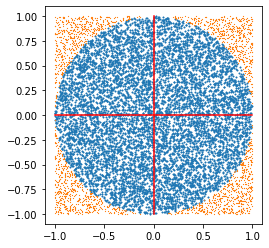

Acceptance Ratio: 0.781800


In [12]:
N = 10_000
accept = []
reject = []

for _ in range(N):
    x, y = uniform()*2-1, uniform()*2-1
    # Your code goes here!
    radius = 1
    if math.sqrt(x**2 + y**2) <= radius:
        accept.append((x, y))
    else:
        reject.append((x, y))

render_rs_2d(accept, reject, True)

# Measured AR
acceptance = len(accept) / N
print(f"Acceptance Ratio: {acceptance:.6f}")

**Expected ratio:** pi/4 = 0.78539816339

**TG.2 Task (b)** *(Triangle Transform)*

In this task, we use rejection sampling to generate uniformly random points inside the triangle.

(i) Implement the rejection sampling routine in the code cell below.

(ii) You should find your acceptance to be lower than 45%. What simple change can you make to the code to increase the acceptance ratio? What is the maximum expected acceptance ratio you can hope to achieve?

In [ ]:
arc_60deg = pi/3

# The two vectors spanning the red lines
vec_a = np.array([1, 0])
vec_b = np.array([cos(arc_60deg),sin(arc_60deg)])

N = 10_000
accept = []
reject = []

for _ in range(N):
    x, y = uniform(), uniform()
    # Your code goes here!
    reject.append((x,y))

plt.plot([0,vec_a[0]],[0,vec_a[1]], color="red")
plt.plot([0,vec_b[0]],[0,vec_b[1]], color="red")
render_rs_2d(accept, reject, False)

# Measured AR
acceptance = len(accept) / N
print(f"Acceptance Ratio: {acceptance:.6f}")

# Exercise TH.2

**Exercise TH.2** *(Bivariate Distribution)*

In Exercise **TG.3**, we studied the bivariate distribution

$$
\begin{align*}
f&: \mathbb{R}^2 \to \mathbb{R} \\
f&(x,y) = x + y 
\end{align*}
$$

for values $x, y \in [0, 1]$. In this exercise, we will use rejection sampling to generate 2-dimensional samples that are $f$-distributed.

*Note*: Contrary to the rejection sampling examples so far, points of the form $(x, y, f(x, y))$ are 3-dimensional.

(a) Implement the rejection sampling routine in the code cell below.

(b) Take a look at the measured acceptance ratio. Argue why you arrive at *that* particular value.

(c) It is clear that rejection sampling from $[0,1]^2$ cannot achieve a higher acceptance ratio than that from (b). In order to achieve an acceptance ratio of 100%, can you modify otherwise rejected values to accept them instead?
*Hint*: Visualize the function $f$ if you are stuck.

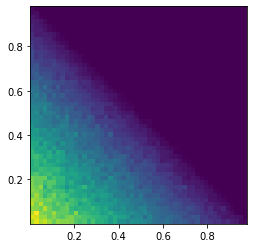

Acceptance Ratio: 0.166182


In [15]:
# This function renders points as a 3d histogram
# The third dimension is represented by a color gradient
def render_points_3d(points):
    xs = [x for (x,_) in points]
    ys = [y for (_,y) in points]
    plt.gca().set_aspect('equal')
    plt.hist2d(xs, ys, density=True, bins=50)
    plt.show()

N = 1_000_000
accept = []
reject = []

for _ in range(N):
    u, x, y = uniform(), uniform(), uniform()
    # Your code goes here!
    if x + y < u:
        accept.append((x, y))
    else:
        reject.append((x, y))
render_points_3d(accept)

# Measured AR
acceptance = len(accept) / N
print(f"Acceptance Ratio: {acceptance:.6f}")

# Exercise TH.3

**Exercise TH.3** *(Sampling Parabolas)*

In this exercise, we will use rejection sampling with a good envelope function to generate parabola-distributed samples with a high acceptance ratio. Consider the random variable X with PDF

$$
\begin{align*}
f(x) = \frac{-6}{\pi^3}x\cdot(x-\pi)
\end{align*}
$$

for values $x \in [0, \pi]$. To achieve a high acceptance ratio for rejection sampling, we will not sample points inside $[0, \pi]\times[0, .5]$, but instead we will use an easy to control envelope function to draw samples from.

In [ ]:
def f(x):
    return -6/pi**3 * x *(x-pi)

In [ ]:
N = 4_000
accept = []
reject = []

# To verify our results, draw the function f which we try to generate samples for
x = np.linspace(0, pi, 100)
plt.plot(x,f(x), "r-")

for _ in range(N):
    U1, U2 = uniform(), uniform()
    # Your code goes here
    reject.append((U1, U2))

render_rs_2d(accept, reject, False)

# Measured AR
acceptance = len(accept) / N
print(f"Acceptance Ratio: {acceptance:.6f}")

# Exercise TH.4

**Exercise TH.4** *(Hump Distribution)*

In this exercise, we will use rejection sampling to sample from the *hump distribution*. Consider the random variable X with PDF

$$
\begin{align*}
f(x) = -\frac{4}{5}x^2(x-1.6)(x+1)
\end{align*}
$$

for values $x \in [-1, 1.6]$.

In [ ]:
N = 10000
accept = []
reject = []

def hump(x):
    return -15/4*x**2*(x**2-1)

# To verify our results, draw the hump function which we try to generate samples for
x = np.linspace(-1, 1, 100)
plt.plot(x,hump(x), "r-")

for _ in range(N):
    x, y = uniform(), uniform()
    reject.append((x,y))

render_rs_2d(accept, reject)

# Measured AR
acceptance = len(accept) / N
print(f"Acceptance Ratio: {acceptance:.6f}")